#Table Transformer For Table detection

##In this Notebook we are going see how table struture and table detection using Tranformers

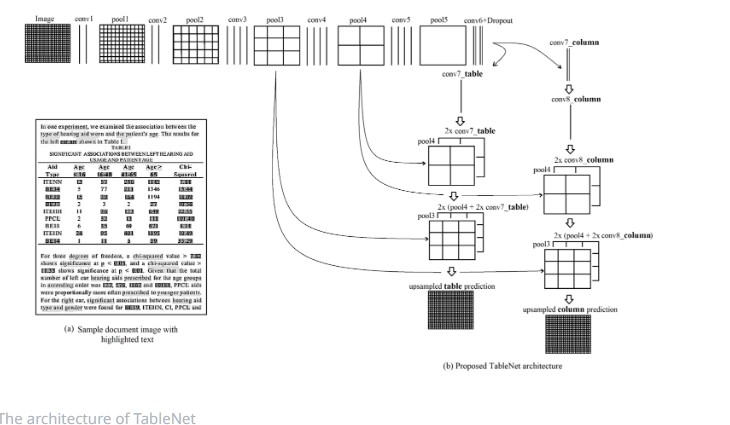

In [ ]:
#credit to HuggingFace and Microsoft
#installind Dependencies
!pip install -q git+https://github.com/huggingface/transformers.git

In [ ]:
!pip install -q timm

##Table detection

In [ ]:

from huggingface_hub import hf_hub_download
from PIL import Image
file_path='/content/invoicetest.png'
#converting images into RGB
image = Image.open(file_path).convert("RGB")
width, height = image.size
image.resize((int(width*0.5), int(height*0.5)))

In [ ]:

from transformers import DetrFeatureExtractor
#Importing Feature Extractor
feature_extractor = DetrFeatureExtractor()
encoding = feature_extractor(image, return_tensors="pt")
encoding.keys()

In [ ]:
#shaping The pixel value 
print(encoding['pixel_values'].shape)

In [ ]:
#using TableTransformer for the detection
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

In [ ]:
import torch

with torch.no_grad():
  outputs = model(**encoding)

In [ ]:
#ploting
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [ ]:
# rescale bounding boxes
width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

In [ ]:
plot_results(image, results['scores'], results['labels'], results['boxes'])

##Table Transformer Pipeline

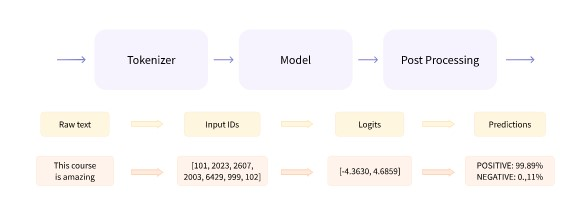

In [ ]:
encoding = feature_extractor(image, return_tensors="pt")
encoding.keys()

In [ ]:
from huggingface_hub import hf_hub_download
from PIL import Image

file_path="/content/invoivetest2.jpeg"
image = Image.open(file_path).convert("RGB")
width, height = image.size
image.resize((int(width*0.5), int(height*0.5)))

##Table Structure Detection

In [ ]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

In [ ]:
with torch.no_grad():
  outputs = model(**encoding)

In [ ]:
target_sizes = [image.size[::-1]]
#Threshold if increases Some Rows cannot be detected if Threshhold decreases The Detection of structure decreases 
results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]
plot_results(image, results['scores'], results['labels'], results['boxes'])